**Consigna:**  <a name="q1"></a>
 
*Objetivos*

Deberán generar un modelo de machine learning el cual pueda clasificar review en inglés para la plataforma Yelp. Es decir, nuestro modelo recibirá una review de un usuario, y deberá ser capaz de determinar si esta es positiva o negativa.

*Dataset*

Las features que contiene este dataset son las siguientes:
				
●  business_id: identificador del negocio al que se está realizando la review.

●  cool: cantidad de votos por haber sido una review “cool”.

●  date: fecha de realización de la revisión.

●  funny: cantidad de votos para una revisión “divertida”.

●  review_id: identificador único de revisión (ofuscado).

●  stars: cantidad de estrellas otorgadas por el usuario en referencia a la review.

●  text: revisión realizada por el usuario sobre un determinado negocio.

●  useful: cantidad de votos recibido por los usuarios a los cuales le resultó útil la revisión.

● user_id: id del usuario en la plataforma (ofuscado).

*Consideraciones*

●  No contamos con una variable target como pasa en problemas de la vida real. Por ello, un desafío extra que se presenta es cómo definir un target, basado en las features del dataset.
 				
●  Muchas veces cuando importamos un dataset pandas infiere que valor podría ser, de no encontrar un valor conocido pone uno por defecto.Validar que los tipos de datos de las features después de importarse correspondan con su valor intrínseco es una buena práctica.

●  Haga una rápida exploración de valores atípicos (outliers) del conjunto de datos. Realice los gráficos que considere pertinente para entender la naturaleza del problema.


*Evaluación*
 								
Para la evaluación de los modelos vamos a utilizar las siguientes métricas:
 							
●  Precision.

●  Recall.

●  F1-score.

●  Análisis de AUC ROC.









# IMPORTS

In [ ]:
%%capture
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
! pip install langdetect
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression # Clasificador
from sklearn.metrics import classification_report # Metricas para valoracion del modelo
from sklearn.metrics import f1_score, confusion_matrix # Metricas para valoracion del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score # Metricas para valoracion del modelo
from sklearn.metrics import plot_confusion_matrix 
import re, string, unicodedata
import nltk
import pickle
from nltk import word_tokenize
nltk.download("stopwords") 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk.tokenize import WhitespaceTokenizer 
from wordcloud import WordCloud
from scipy import sparse
import xgboost
from xgboost import XGBClassifier
#from nltk import pos_tag 
#nltk.download('averaged_perceptron_tagger')
import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras_visualizer import visualizer
#from langdetect import detect
from keras.preprocessing.text import Tokenizer                    
#from keras.preprocessing.sequence import pad_sequences
#from keras import layers

# CARGA DEL SET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/reviews_yelp_nn.csv',sep='\t', error_bad_lines=False )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Vemos las primeras 5 filas del dataset y podemos apreciar las columnas.
#Podemos ver que hay diferentes reseñas para diferentes lugares...nomenclados con un id, no se sabe que tipo de negocio es. podriamos ver cuantos negocios poseen reseñas. como tambien la diferencia entre las mismas
#Tenemos la columna "cool" que describe la percepcion de los lectores de las reseñas a la reseña en particular, con "cool" vamos a entender sensacional|muy bueno y podriamos decir que es un apoyo a la reseña por parte del lector
#Con la columna date, sabemos que tenemos la fecha de la realizacion de la reseña...podemos ver si participa o no en la calidad del servicio
#Con review id tenemos el identificador unico de la reseña
#Con stars tenemos la puntuacion que le dieron al servicio que se brindò
#Text hace referencia a la reseña en si.
#La columna Useful, se refiere a cuan util se encontró la reseña para el lector.
#User_id referencia a el usuario que realizó la reseña.
df.head()


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.000,uJRdHLz4XNmDK5pOkWbZNA,5.000,"Best Dim Sum in the city, their cart service i...",0.000,POETn3fQcZ8ngLAARCATSg
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.000,TlPh8jy8bt_TSGfjEw-pvA,5.000,How... HOW did I not head down here sooner? Fo...,7.000,oUK6Xs5dPPnP4whFeZExGg
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.000,GmoBAVE1pTo0kjmeKrXmLQ,4.000,Carnitas were wonderful. First time there and ...,0.000,SiaSUNlKQK7f57WBPmyyNw
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.000,ZHuM9P81zfuNuFZ5ThXNRg,5.000,Great staff who are always willing to help. I ...,0.000,PsH5Qi8R69WAlhNv8mXWRA
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.000,-2Ce00mfWYP20yt7k6kARg,3.000,"This place is bigger, brighter, new so it's cl...",3.000,r-zUIQPaHzvIyL93wQaoiQ


In [ ]:
#Vemos la cantidad de columnas y filas del set de datos.
df.shape

(3342958, 9)

Tenemos como minimo 3342958 Reseñas en el set de datos.

In [ ]:
#Vemos la informacion general del dataset, tipo de datos, cantidad de columnas y entradas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342958 entries, 0 to 3342957
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   business_id  object 
 1   cool         object 
 2   date         object 
 3   funny        float64
 4   review_id    object 
 5   stars        float64
 6   text         object 
 7   useful       float64
 8   user_id      object 
dtypes: float64(3), object(6)
memory usage: 229.5+ MB


# LIMPIEZA


##Duplicados e información de las variables

In [ ]:
#Vemos si hay duplicados
df.duplicated().sum()

0

No hay filas completamente duplicadas.

In [ ]:
df.duplicated(subset=['review_id']).sum()

8

Hay 8 filas que comparten el id de la review, esto no deberia ser asi.

In [ ]:
df[df.duplicated(subset=['review_id'])]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
555832,"shaved carrot, radish, black sesame, scallion,...",NaN,NaN,nan,NaN,nan,NaN,nan,NaN
555833,"(sancho, honey, five spice, leek, arugula), an...",0.000,4Mbri1GnqEPj6ZTDB9u-Wg,nan,NaN,nan,NaN,nan,NaN
793151,0,QRn8ELZmvP8S4evnSRU9bQ,NaN,nan,NaN,nan,NaN,nan,NaN
1412576,"Frites de Yuca, Sauce, Fromage en grain, Mojo ...",NaN,NaN,nan,NaN,nan,NaN,nan,NaN
1412577,"Vaca Frita (boeuf), Salade de Coriande. And I...",0.000,oW9PoxLCSMwZ6EEjKuPNjw,nan,NaN,nan,NaN,nan,NaN
1650901,1,aZs_IrhA7rvuLBumVhJjCw,NaN,nan,NaN,nan,NaN,nan,NaN
2476993,"wagyu beef, chili mayo, fried egg, furikake ca...",2.000,0QfV3xDQ87R8mBqa1W7xlQ,nan,NaN,nan,NaN,nan,NaN
2910902,"Deep fried marinated squid, shrimp, white fish...",2.000,8Dvr-U6jCZTVGD52LwC2qA,nan,NaN,nan,NaN,nan,NaN


Vemos que las filas que comparten el id_review tienen coomo valor Nan en múltiples columnas, por lo tanto, las borramos ya que no aportan nada.

In [ ]:
df=df.drop_duplicates(subset="review_id", keep=False)

Ahora pasaremos a corroborar si hay textos de reviews repetidos para un mismo usuario, esto es importante ya que a la hora de trabajar con los modelos, si hay textos repetidos, se obtendran mas frecuencias de palabras de textos que son iguales, que no agregan variabilidad al modelo ya que son registros duplicados

In [ ]:
df.duplicated(subset=['text',"user_id"]).sum()

4311

Vemos que hay 4311 filas que comparten el texto entre si y usuario...procedemos a ver estas filas para hacer un analisis minuscioso.

In [ ]:
df[df.duplicated(subset=['text',"user_id"])]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
57659,M-lS6AzGfoVB76at4c0Z7A,0,2018-10-28 06:49:10,0.000,vF3fYI9nN0kZfiEiseiisw,5.000,Been in here many times and the food and servi...,0.000,OTbv0flbnTGjyFrbV30jXQ
62080,1V10_YvvDWkH3EPc1W0Ceg,0,2014-09-02 17:18:07,0.000,lpbaCkDqg46kWkjilowQCw,1.000,Do not trust T-Mobile! Their salespeople and C...,0.000,uIpUqhx9uXizgkRiWHJRVA
66976,b3TMNEZJBnzP3naW-Z2OSw,1,2016-10-25 03:49:30,1.000,MlklQa2mBPi8xUpJlSbkRg,1.000,This goes for both locations and for Dr Randel...,7.000,ZbPEjjdIiMgwdXpAPWSMGQ
74728,L6RxkP8dneVGelDLUhjCug,0,2016-06-21 17:55:23,0.000,kQzLu5pILZkLXamELfaLpQ,5.000,"Cute place, found through searching on Yelp, o...",0.000,4YG3CmhBFYajaxa1L2mIRA
77333,0SCHQdFVdfnF8AN_xjsozA,1,2017-10-09 19:09:09,0.000,hPmmGcLZTBycPiXR4Xjpvw,5.000,BEST EVER! I won't go anywhere else. This plac...,1.000,4x_wS2IeOLz9M1fAS-5REw
...,...,...,...,...,...,...,...,...,...
3341276,GIJ3or4N77EjXIqEk9ZNww,0,2017-09-11 21:28:49,0.000,rDdxCqUIUWjPSNPtyaA8CQ,5.000,My 92 year old mom just had her hair done at t...,0.000,aqw4LOeWk7QnAPQeRBJqig
3342058,mny2GDCiv3HKr8xMr6fafQ,2,2013-04-30 04:06:20,0.000,zjPxLtyIbl_ft014OHK67A,1.000,I've been with them for 15+ years and never ha...,3.000,wNOmsbvx91wqDKt_B3MHdg
3342273,5f0X-QHUIX-ASUpHZTrN3Q,0,2015-08-03 19:17:25,0.000,IexJWpP0jnw02bWvkgT3tA,1.000,Went in to pay off a loan via shared branching...,2.000,e0Avp460-NyP8_CPqJbmsg
3342619,ORqZyyZafJyZcgTGNrJ_oA,0,2016-08-16 06:55:06,0.000,VjRoCw57SquaauA0hCaw5w,5.000,Wifey came here on a dessert adventure with he...,0.000,5Uu4PjuVsD8HYvgfakjaIw


Pasamos a observar un ejemplo de duplicado el texto, para ver cual es el o los campos que lo diferencian entre si ya que podria darse el caso de que sean personas distintas(user_id) que escribieron reseñas chicas...como "Very Good"

In [ ]:
df[df.text.str.contains("Been in here many times and the food and serv",na=False)]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
19489,BjbokieOGk2CCq2t8wV6MA,0,2018-10-28 06:48:21,0.000,SUSR6QpL6CUTFGJhRZoC0g,5.000,Been in here many times and the food and servi...,0.000,OTbv0flbnTGjyFrbV30jXQ
57659,M-lS6AzGfoVB76at4c0Z7A,0,2018-10-28 06:49:10,0.000,vF3fYI9nN0kZfiEiseiisw,5.000,Been in here many times and the food and servi...,0.000,OTbv0flbnTGjyFrbV30jXQ


Como podemos ver, la unica diferencia es la columna date y review_id, esta hace que no aparezca este registro en el algoritmo lanzado mas arriba("df.duplicated().sum()")

Procederemos a la eliminacion de las filas que pertenezcan a la misma persona y posean el mismo texto ya que nos resta diversidad en los registros, lo que hace que el modelo aprenda de memoria datos que no son reales...ya que las palabras que pertenecen a estos textos, tienen más peso que las de otros usuarios.
De igual manera vamos a conservar 1 de estos registros, en este caso el primero.

In [ ]:
df=df.drop_duplicates(subset=["text","user_id"], keep="first")

Cambiamos el tipo de dato en la columna "date" a datetime, la de la columna cool a float y la columna text a string.

In [ ]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')
df["cool"] = df.cool.astype(float)
df["text"] = df.text.astype(str)

Observaremos los períodos en que se receptaron reviews.

In [ ]:
print ("La primer review se produjo "+ str(df.date.min()))
print ("La última review se produjo "+ str(df.date.max()))

La primer review se produjo 2004-10-12 10:13:32
La última review se produjo 2018-11-14 18:13:16


El dataset posee datos de aproximadamente 14 años, lo cual es interesante dado a la evolución constante que sufre el lenguaje, por lo tanto, vamos a tener mayor variabilidad en el texto de las reviews.

Ahora procedemos a ver los valores que poseen las columnas numéricas. 

In [ ]:
df.describe()

,cool,funny,stars,useful
count,3338638.000,3338638.000,3338638.000,3338633.000
mean,0.578,0.482,3.716,1.353
std,2.353,2.342,1.464,3.646
min,-1.000,0.000,1.000,-1.000
25%,0.000,0.000,3.000,0.000
50%,0.000,0.000,4.000,0.000
75%,1.000,0.000,5.000,2.000
max,506.000,970.000,5.000,1122.000


Existen 3338638 votos de tipo cool, cuya medria es 0.578, el maximo es 506 de votos como cool.
Existen 3338638 votos de tipo funny, cuya medria es 0.482, el maximo es 97 de votos como funny de una review.
Existen 3338638 reviews catalogadas con estrellas, en promedio las reviews tienen 3 estrellas y el maximo es 5 de estrellas en una review.
Existen 3338633 votos de tipo usefull, cuya medria es 1.353, el maximo es 1122 de votos para una review como usefull.

Haciendo foco en cada una de ellas:

In [ ]:
df.cool.value_counts()

0.000      2503882
1.000       505541
2.000       156656
3.000        64605
4.000        33037
            ...   
162.000          1
164.000          1
169.000          1
176.000          1
506.000          1
Name: cool, Length: 168, dtype: int64

In [ ]:
df.funny.value_counts()

0.000      2652525
1.000       406110
2.000       128212
3.000        55846
4.000        29848
            ...   
176.000          1
177.000          1
89.000           1
183.000          1
256.000          1
Name: funny, Length: 187, dtype: int64

In [ ]:
df.stars.value_counts(normalize=True)

5.000   0.439
4.000   0.220
1.000   0.150
3.000   0.111
2.000   0.081
Name: stars, dtype: float64

La variable stars está asociada a la calificación de la review, es decir, si la misma es positiva, neutra o negativa. 

A continuación, se ilustra la distribución y la clasificación según cantidad de estrellas.

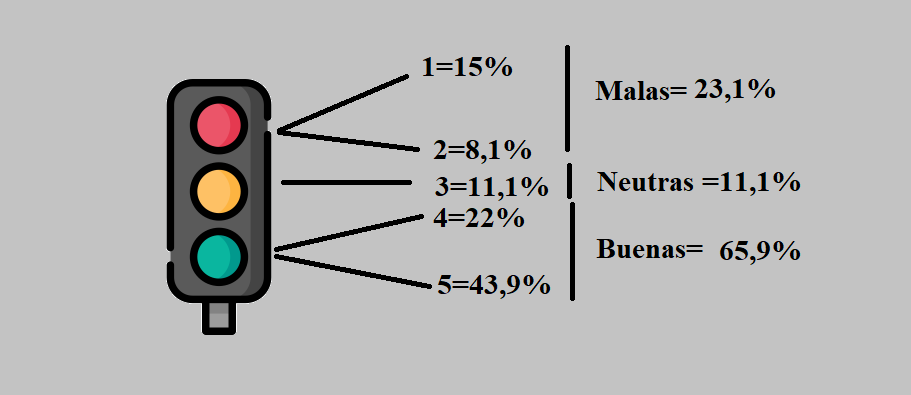

In [ ]:
df.useful.value_counts()

0.000      1782410
1.000       713974
2.000       334860
3.000       175082
4.000       100971
            ...   
209.000          1
220.000          1
222.000          1
223.000          1
507.000          1
Name: useful, Length: 232, dtype: int64

Se eliminan las columnas que no aportan a la predicción

In [ ]:
#df = df.drop(columns = ['date','business_id','review_id','user_id'], axis=1) 

##Nulos 

Se procede a analizar los valores nulos

In [ ]:
df.isna().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         5
user_id        5
dtype: int64

Vemos las filas que poseen valores nulos en el campo "useful"

In [ ]:
df[df.useful.isna()]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
555830,ALwAlxItASeEs2vYAeLXHA,1.000,2017-11-11 03:30:10,0.000,Nb2Z_jTtDw_Rr5N_kWMF0A,5.000,A friend shared a meal with me. Fire & Ice Ramen,nan,NaN
1412575,u3rgkk2BjR2G3l2d3d2wTA,1.000,2017-02-18 06:29:57,2.000,2tNx2n1A7DNU8LeROS6bxA,5.000,First time going to La Habanera was for Poutin...,nan,NaN
1662390,eO0Dsp8MBjUT16lno8gkmA,0.000,2017-02-22 01:24:23,0.000,OSdqcxyXqM-XTEgajJNUmw,5.000,Working with Tina and Marcia has been such a p...,nan,NaN
2476992,ZibmYdOPKLlqDM9oR6xzOA,1.000,2016-07-01 19:08:35,0.000,0sMT9NZn6K4ayWSxUuLthg,5.000,I've been here a few times. This place is grea...,nan,NaN
2910901,yxQsedCcjJEfqhC7u8Rl0A,0.000,2017-04-24 05:09:16,0.000,WDpeUnz4F4DaOK3-GkQxDQ,3.000,We went as a group of 4 and ordered the Frittu...,nan,NaN


Como no es una columna prioritaria, se procede a dejarlos en el set de datos.

Eliminamos los valores nulos en text y stars dado que no permiten llevar a cabo la predicción

In [ ]:
df = df.dropna(subset=['stars', 'text'])

# EDA

##Variable objetivo

Analizamos la variable Stars, la cual será nuestro target.

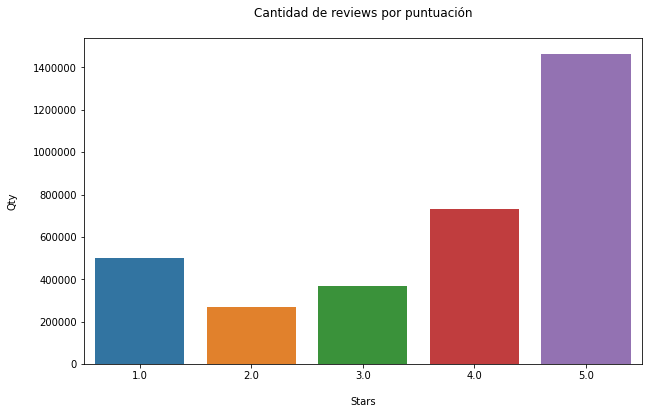

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='stars', data=df)
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("\nStars")
plt.ylabel("Qty\n")
plt.title('Cantidad de reviews por puntuación\n')
plt.show()

Tal como observamos anteriormente en forma de porcentaje, la moyor cantidad de reviews poseen una puntaje de 5 estrellas, seguido por reviews con 4 estrellas y 1 estrella. 

A partir de ahora, dejaremos de considerar las reviews de 3 estrellas como neutras para poder trabajar en una clasificación binaria. 


*   1-3 -> Negativo
*   4-5 -> Positivo



In [ ]:
#Creamos esta funcion para poder clasificar las estrellas en 2 tipos de datos, positivos y negativos
def classification(rate):
    if rate <= 3:
        return 'Negativo'
    else:
        return 'Positivo'

In [ ]:
#Aplicamos la funcion a la columna starts
df['ReviewLabel'] = df['stars'].apply(lambda row: classification(row))

In [ ]:
#Creamos esta funcion para poder clasificar las estrellas en 2 tipos de datos, 1 y 0
def class_code(rate):
    if rate <= 3:
        return 0
    else:
        return 1

In [ ]:
#Aplicamos la funcion a la columna starts
df['ReviewCode'] = df['stars'].apply(lambda row: class_code(row))

In [ ]:
#Visualizamos las nuevas 2 columnas
df[['ReviewLabel','ReviewCode']]

,ReviewLabel,ReviewCode
0,Positivo,1
1,Positivo,1
2,Positivo,1
3,Positivo,1
4,Negativo,0
...,...,...
3342953,Negativo,0
3342954,Positivo,1
3342955,Positivo,1
3342956,Negativo,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


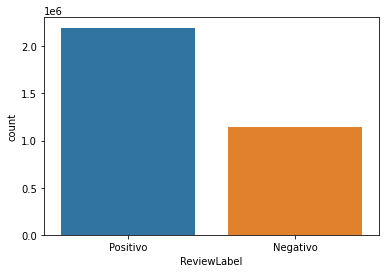

In [ ]:
sns.countplot(df['ReviewLabel'])   

Aquí podemos ver que hay un desbalance entre las clases positivas y las clases negativas...mas adelante tendremos que realizar algo para poder salvar la diferencia entre ambas clases

In [ ]:
df.ReviewLabel.value_counts(normalize=True)

Positivo   0.658
Negativo   0.342
Name: ReviewLabel, dtype: float64

## Relación entre puntaje y la calificación de las reviews

Cada review posee 3 variables que la califican en que tan cool, funny y useful es la misma. 

In [ ]:
#Creamos 3 df para analizar la correlacion entre ellas.
df_cool = df[['stars', 'cool']]
df_funny = df[['stars', 'funny']]
df_useful = df[['stars', 'useful']]

In [ ]:
#plt.figure(figsize=(6,4))
#ax = sns.lineplot(x="stars", y="cool", data=df_cool)
#ax.set_title('Relación entre puntaje y calificación cool');
#plt.figure(figsize=(6,4))
#ax = sns.lineplot(x="stars", y="funny", data=df_funny)
#ax.set_title('Relación entre puntaje y calificación funny');
#plt.figure(figsize=(6,4))
#ax = sns.lineplot(x="stars", y="useful", data=df_useful)
#ax.set_title('Relación entre puntaje y calificación useful');


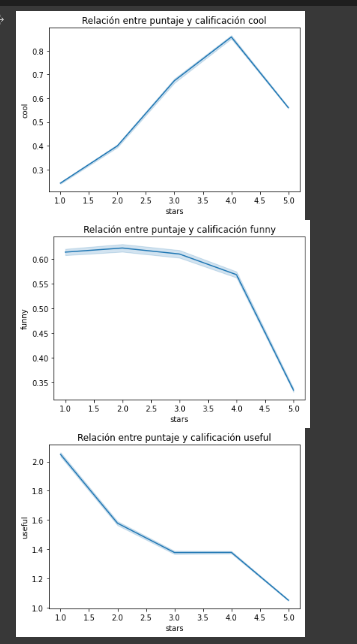

A partir de los gráficos y haciendo ciertas suposiciones, podemos decir que:


*   A medida que aumenta el puntaje, la review es calificada como más cool. En aquellas que poseen puntaje de 5 estrellas esto no se respeta por lo que podemos asociarlo con reviews menos elaboradas. 

*   Siguiendo con la teoría de que las reviews con 5 estrellas son menos elaboradas, éstas son las que menos calificación tienen como funny. Por otro lado, podríamos inferir que la gente considera graciosas o divertidas las malas experiencias.

*   Por último, mientras menor sea el puntaje de la review, la misma es considerada más useful. Esto tiene sentido, ya que las personas tienen en cuenta las malas experiencias sobre las buenas a la hora de elegir un lugar. 


# Empeza desde aca Fran

In [ ]:
%%capture
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
! pip install langdetect
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression # Clasificador
from sklearn.metrics import classification_report # Metricas para valoracion del modelo
from sklearn.metrics import f1_score, confusion_matrix # Metricas para valoracion del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score # Metricas para valoracion del modelo
from sklearn.metrics import plot_confusion_matrix 
import re, string, unicodedata
import nltk
import pickle
from nltk import word_tokenize
nltk.download("stopwords") 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk.tokenize import WhitespaceTokenizer 
from wordcloud import WordCloud 
from scipy import sparse
import xgboost
from xgboost import XGBClassifier
#from nltk import pos_tag 
#nltk.download('averaged_perceptron_tagger')
import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras_visualizer import visualizer
#from langdetect import detect
from keras.preprocessing.text import Tokenizer                    
#from keras.preprocessing.sequence import pad_sequences
#from keras import layers

### 1 saltear al correr

In [ ]:
#df = pd.read_csv('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/reviews_yelp_nn.csv',sep='\t', error_bad_lines=False )

In [ ]:
def preprocessing(texto):
    texto = re.sub(r"http\S+", "",str(texto))#Eliminacion de paginas webs   
    texto = re.sub("@[^\S]*", "", texto)#Eliminacion de mails
    texto = re.sub("#[^\S]*", "", texto)#Eliminacion de paginas webs
    texto = texto.lower() #minúsculas
    texto = [word.strip(string.punctuation) for word in texto.split(" ")]  # Tokenizacion y eliminación de signos de puntuación
    texto = [word for word in texto if not any(c.isdigit() for c in word)] # Eliminación de números
    texto = [t for t in texto if len(t) > 0] # Eliminación de tokens vacíos
    texto = " ".join(texto)
    return(texto)
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [ ]:
df.to_csv('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/data.csv',index=False, encoding='utf-8-sig')

NameError: ignored

### 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/data.csv", error_bad_lines=False )

# 2

In [ ]:
df.isna().sum()

business_id      0
cool             0
date             0
funny            0
review_id        0
stars            0
text           168
useful           5
user_id          5
ReviewLabel      0
ReviewCode       0
dtype: int64

In [ ]:
df=df.dropna(subset=["text"])

##Nube de palabras

La nube de palabras es utilizada para mostrar de manera gráfica las palabras de mayor utilización, en este caso, en las reviews.

Previamente, se quitan las stopwords o palabras que carecen de información. Entre ellas: preposiciones, pronombres, conjunciones, etc.

In [ ]:
# Palabras mas importantes ó de mas sentido SIN stopwords 
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.text)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Palabras más frecuentes - Top 20")
plt.show()

Se pueden observar palabras genéricas con asociación al tipo de la review, por ejemplo: food, restaurant, place, lo que nos lleva a pensar que la mayoría de éstas corresponden a reviews gastronómicas. Por otro lado, poseen mayor relevancia las palabras ¨positivas¨, apreciación lógica debido a que exiten más de este tipo de review.

Para independizarnos del desbalance de las clases, hacemos una nube de palabras para las reviews positivas y otra para las negativas.

In [ ]:
neg= df[df.ReviewCode==0] 
pos= df[df.ReviewCode==1]

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(neg.text)


sum_words = negtxt.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
wordcloud = WordCloud(max_words=50, background_color="white", width = 1500, height = 1500).generate_from_frequencies(dict(words_freq))   
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(pos.text)

sum_words = loaded_model.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

In [ ]:
wordcloud = WordCloud(max_words=50, background_color="white", width = 1500, height = 1500).generate_from_frequencies(dict(words_freq))   
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Palabras Reviews Negativas

# MODELADO

##Preprocesamiento

Antes de aplicar los modelos, balancemos las clases:

Eliminamos aquellas columnas que no aportan al aprendizaje del modelo.

In [ ]:
df.drop(columns=["business_id","date","review_id","user_id",'cool','funny','useful'], inplace=True)

KeyError: ignored

In [ ]:
df

,stars,text,ReviewLabel,ReviewCode
0,5.000,best dim sum in the city their cart service is...,Positivo,1
1,5.000,how how did i not head down here sooner for re...,Positivo,1
2,4.000,carnitas were wonderful first time there and t...,Positivo,1
3,5.000,great staff who are always willing to help i h...,Positivo,1
4,3.000,this place is bigger brighter new so it's clea...,Negativo,0
...,...,...,...,...
3338465,2.000,slow service to seat and then to serve left wa...,Negativo,0
3338466,4.000,i stayed at the bellagio for nights this month...,Positivo,1
3338467,5.000,book an appointment you get to walk past all t...,Positivo,1
3338468,1.000,this review is based on quality of pricing not...,Negativo,0


#mapeamos target


## División Dataset en entrenamiento y testeo


In [ ]:
X = df.text
y = df.ReviewCode

In [ ]:
print(X.head())
print(y.head())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
stop_words = stopwords.words('english') 

##Count Vectorizer

In [ ]:
X_train=X_train.dropna()

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer  = CountVectorizer(stop_words=stop_words)

In [ ]:
training_data = vectorizer.fit_transform(X_train)

In [ ]:
from scipy import sparse

In [ ]:
training_data

<2670776x403003 sparse matrix of type '<class 'numpy.int64'>'
	with 123960607 stored elements in Compressed Sparse Row format>

In [ ]:
sparse.save_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix.npz", training_data)

In [ ]:
your_matrix_back = sparse.load_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix.npz")

In [ ]:
your_matrix_back

<2670776x403003 sparse matrix of type '<class 'numpy.int64'>'
	with 123960607 stored elements in Compressed Sparse Row format>

In [ ]:
df.to_csv('/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/data.csv',index=False, encoding='utf-8-sig')

In [ ]:
testing_data = vectorizer.transform(X_test)

In [ ]:
sparse.save_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix1.npz", testing_data)

In [ ]:
your_matrix_back1 = sparse.load_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix1.npz")

In [ ]:
vectorizer.vocabulary_ 

{'toughest': 355458,
 'time': 351532,
 'finding': 127009,
 'good': 146015,
 'slice': 319600,
 'look': 204337,
 'like': 201040,
 'sitting': 318005,
 'hours': 164583,
 'tried': 357974,
 'avoid': 24412,
 'chains': 60514,
 'city': 68432,
 'sometimes': 323673,
 'want': 377681,
 'pie': 263261,
 'easy': 107262,
 'choice': 65845,
 'seems': 308602,
 'something': 323636,
 'odd': 243535,
 'toronto': 354730,
 'rockies': 295372,
 'prairies': 270994,
 'land': 195818,
 'stand': 330078,
 'way': 378906,
 'vancouver': 369742,
 'happened': 155181,
 'pizza': 265012,
 'world': 385741,
 'oh': 244344,
 'miss': 224266,
 'crazy': 81337,
 'varieties': 370167,
 'available': 23919,
 'west': 380515,
 'potatoe': 270018,
 'trend': 357605,
 'really': 283743,
 'except': 118738,
 'fine': 127034,
 'establishment': 116388,
 'wanted': 377694,
 'try': 359201,
 'version': 372540,
 'looks': 204396,
 'chips': 65181,
 'appetizing': 16376,
 'place': 265349,
 'offers': 243941,
 'variety': 370168,
 'point': 267432,
 'pay': 257335

In [ ]:
len(vectorizer.vocabulary_)

403003

###Implementación Naive Bayes

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(your_matrix_back, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(your_matrix_back1)

###Implementación XGBOOST

In [ ]:
xgb=XGBClassifier()
xgb.fit(your_matrix_back,y_train)
predxgb = xgb.predict(your_matrix_back1)

## Métricas

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(13,7))
    lw = 2
    plt.plot([0,1], [0, 1])
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()

### METRICAS NAIVE BAYES CON CV

In [ ]:
accuracy_nb_cv = accuracy_score(y_test, predictions)
precision_nb_cv = precision_score(y_test, predictions)
recall_nb_cv = recall_score(y_test, predictions)
f1_nb_cv = f1_score(y_test, predictions)
print('Resultados:')
print('Accuracy score NB con CV  : {:.2f}'.format(accuracy_nb_cv))
print('Precisión score NB con CV : {:.2f}'.format(precision_nb_cv))
print('Recall score NB con CV    : {:.2f}'.format(recall_nb_cv))
print('F1 score NB con CV        : {:.2f}'.format(f1_nb_cv))

Resultados:
Accuracy score NB con CV  : 0.86
Precisión score NB con CV : 0.88
Recall score NB con CV    : 0.91
F1 score NB con CV        : 0.89


In [ ]:
probs=naive_bayes.predict_proba(your_matrix_back1)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)

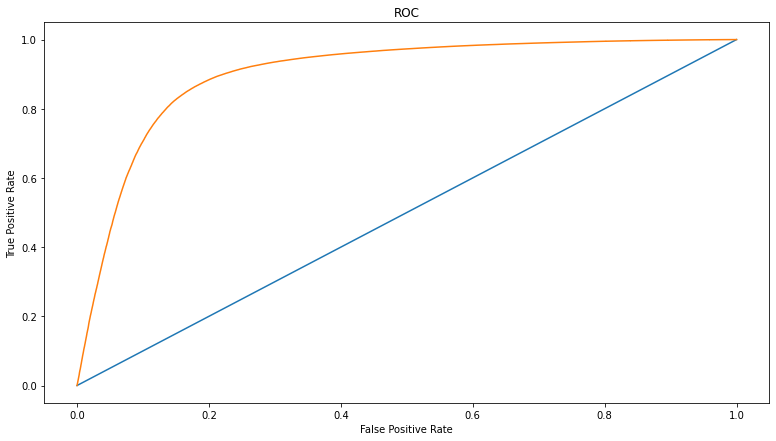

In [ ]:
plot_roc_curve(fpr, tpr)

### MÉTRICAS XGBOOST CON CV

In [ ]:
accuracy_xgb_cv = accuracy_score(y_test, predxgb)
precision_xgb_cv = precision_score(y_test, predxgb)
recall_xgb_cv = recall_score(y_test, predxgb)
f1_xgb_cv = f1_score(y_test, predxgb)
print('Resultados:')
print('Accuracy score xgb con CV  : {:.2f}'.format(accuracy_xgb_cv))
print('Precisión score xgb con CV : {:.2f}'.format(precision_xgb_cv))
print('Recall score xgb con CV    : {:.2f}'.format(recall_xgb_cv))
print('F1 score xgb con CV        : {:.2f}'.format(f1_xgb_cv))

Resultados:
Accuracy score xgb con CV  : 0.83
Precisión score xgb con CV : 0.81
Recall score xgb con CV    : 0.96
F1 score xgb con CV        : 0.88


In [ ]:
probs=xgb.predict_proba(your_matrix_back1)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)

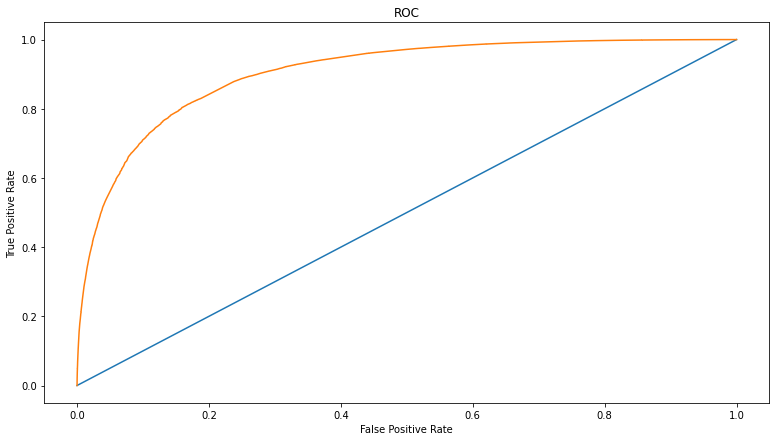

In [ ]:
plot_roc_curve(fpr, tpr)

## TF-IDF Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

In [ ]:
training_data_tfidfVectorizer = tfidf_vectorizer.fit_transform(X_train)
testing_data_tfidfVectorizer  = tfidf_vectorizer.transform(X_test)

In [ ]:
sparse.save_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix3.npz", training_data_tfidfVectorizer)
sparse.save_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix4.npz", testing_data_tfidfVectorizer)

In [ ]:
yourmatrix3 = sparse.load_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix3.npz")
yourmatrix4 = sparse.load_npz("/content/drive/Shareddrives/Diplo DS -Grupo 01/TP5/yourmatrix4.npz")

###Implementación Naive Bayes

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(yourmatrix3, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(yourmatrix4)

## Implementacion XGBOOST

In [ ]:
xgb=XGBClassifier()
xgb.fit(yourmatrix3,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predxgb = xgb.predict(yourmatrix4)

### Métricas

### Metricas de NAIVE BAYES CON TD-IDF

In [ ]:
predictions = naive_bayes.predict(yourmatrix4)

In [ ]:
accuracy_nb_tv = accuracy_score(y_test, predictions)
precision_nb_tv = precision_score(y_test, predictions)
recall_nb_tv = recall_score(y_test, predictions)
f1_nb_tv = f1_score(y_test, predictions)
print('Resultados Naive Bayes:')
print('Accuracy score NB con TV : {:.2f}'.format(accuracy_nb_tv))
print('Precisión score NB con TV: {:.2f}'.format(precision_nb_tv))
print('Recall score NB con TV   : {:.2f}'.format(recall_nb_tv))
print('F1 score NB con TV       : {:.2f}'.format(f1_nb_tv))

Resultados Naive Bayes:
Accuracy score NB con TV : 0.86
Precisión score NB con TV: 0.84
Recall score NB con TV   : 0.96
F1 score NB con TV       : 0.90


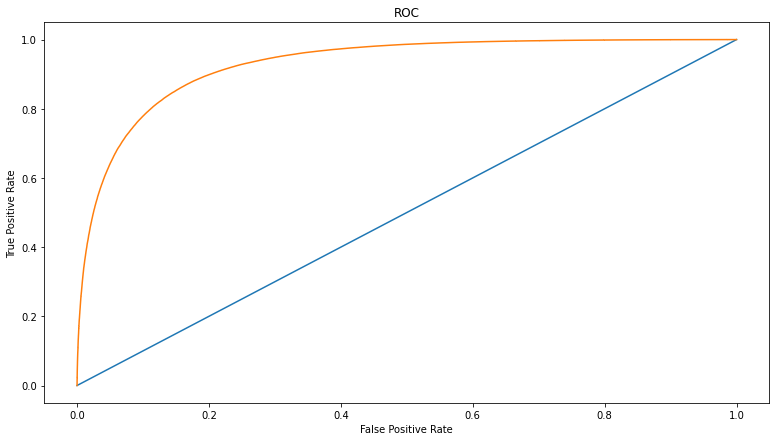

In [ ]:
probs=naive_bayes.predict_proba(yourmatrix4)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Metricas de XGBOOST CON TD-IDF

In [ ]:
predictions = xgb.predict(yourmatrix4)

In [ ]:
accuracy_xgb_tv = accuracy_score(y_test, predxgb)
precision_xgb_tv = precision_score(y_test, predxgb)
recall_xgb_tv = recall_score(y_test, predxgb)
f1_xgb_tv = f1_score(y_test, predxgb)
print('Resultados xgb:')
print('Accuracy score xgb con TV : {:.2f}'.format(accuracy_xgb_tv))
print('Precisión score xgb con TV: {:.2f}'.format(precision_xgb_tv))
print('Recall score xgb con TV   : {:.2f}'.format(recall_xgb_tv))
print('F1 score xgb con TV       : {:.2f}'.format(f1_xgb_tv))

Resultados xgb:
Accuracy score xgb con TV : 0.83
Precisión score xgb con TV: 0.82
Recall score xgb con TV   : 0.95
F1 score xgb con TV       : 0.88


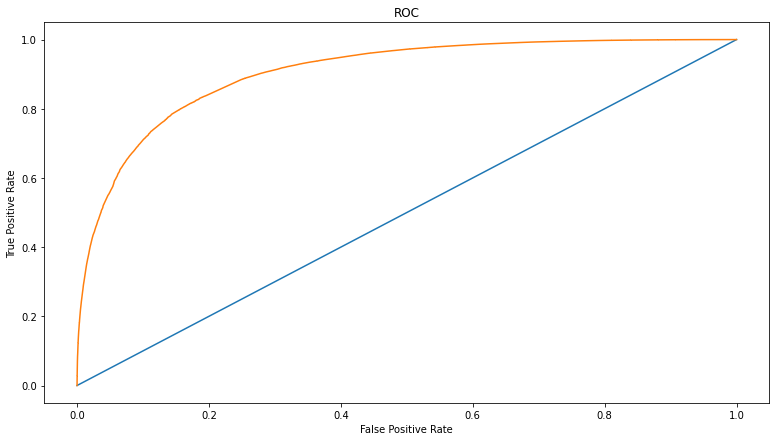

In [ ]:
probs=xgb.predict_proba(yourmatrix4)
probs=probs[:,1]
roc_auc_score(y_test, probs)
fpr, tpr, umbral= roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

##Conclusiones

In [ ]:
print('Tabla comparativa')
d = [ ["Accuracy score", accuracy_nb_cv, accuracy_knn_cv , accuracy_nb_tv, accuracy_knn_tv],
     ["Precisión score", precision_nb_cv, precision_knn_cv, precision_nb_tv, precision_knn_tv],
     ["Recall score", recall_nb_cv, recall_knn_cv, recall_nb_tv, recall_knn_tv],
     ["F1 score", f1_nb_cv, f1_knn_cv, f1_nb_tv, f1_knn_tv]]

print(tabulate(d, headers=["Metrica", "NB con TV", "NB con CV", "RN 1"]))